# Econometrics Problem Set 3

### In this problem set we will be working on hypothesis testing. To do this we will be working looking at state level voting data from previous US elections to see what we can infer about how different states will vote in the US election by looking at a number of different variables that might impact voting habits in US states. First lets import the different libraries that we will need to analyse the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import statsmodels.api as sm

### Now lets read the data in to pandas and have a look at the different categories that we have and what the data types in them are.

In [3]:
file_path = r"C:\Users\tomdo\Documents\PythonProjects\EconometricsCourse\Econometrics_Problem-Set-3\problemset3-1.xls"
df = pd.read_excel(file_path)
df.head()

,State,Democrat,Republican,Church_attendance,Black,Hispanic,GDP,Population,GDP_pc,Violence,...,Med_spend,Med_enr,Male,Female,Sex,Per_18,Per_45,Per_65,Med_age,Debt
0,Alabama,38.36,60.55,58,26.2,3.9,186299.0,4.8,38686.9,383.7,...,4426,922,2320188,2459548,94 .3,23 .7,26 .8,13 .8,37 .9,20608.0
1,Alaska,40.81,54.80,31,3.3,5.5,57670.1,0.7,78957.0,635.3,...,1279,109,369628,340603,108 .5,26 .4,27 .7,7 .7,33 .8,3685.9
2,Arizona,44.59,53.65,39,4.1,29.6,268289.0,6.6,40918.7,413.6,...,7177,1155,3175823,3216194,98 .7,25 .5,24 .5,13 .8,35 .9,36088.4
3,Arkansas,36.88,60.57,53,15.4,6.4,108745.0,3.0,36836.4,503.5,...,3821,600,1431637,1484281,96 .5,24 .4,26 .0,14 .4,37 .4,9826.0
4,California,60.24,37.12,35,6.2,37.6,2144500.0,38.0,56492.5,439.6,...,44634,9127,18517830,18736126,98 .8,25 .0,24 .9,11 .4,35 .2,271051.5


In [4]:
df.describe()

,Democrat,Republican,Church_attendance,Black,Hispanic,GDP,Population,GDP_pc,Violence,Unemployment,...,Muslim,Buddhist,Hindu,Mortality,Literacy,Med_spend,Med_enr,Male,Female,Debt
count,51.000000,51.000000,51.000000,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000,...,49.000000,49.000000,49.000000,51.000000,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01,51.000000
mean,49.025686,48.999608,41.490196,11.121569,10.568627,3.153683e+05,6.156863,52604.150980,385.280392,7.294118,...,0.612245,0.826531,0.632653,6.750588,11.803922,7331.176471,1102.705882,2.976104e+06,3.077730e+06,34970.078431
std,11.810936,11.744209,9.135365,11.021240,9.874016,3.892853e+05,6.973070,20546.997553,195.113742,1.725156,...,0.275100,0.389324,0.284596,1.452269,4.386432,9708.387999,1509.663715,3.367022e+06,3.457549e+06,54539.991031
min,24.750000,7.280000,23.000000,0.400000,1.200000,2.888740e+04,0.600000,33385.500000,122.100000,3.100000,...,0.500000,0.500000,0.500000,3.870000,6.000000,513.000000,65.000000,2.842220e+05,2.761890e+05,978.200000
25%,40.225000,41.135000,35.000000,3.100000,4.300000,8.059215e+04,1.750000,43150.550000,260.850000,5.900000,...,0.500000,0.500000,0.500000,5.610000,8.000000,1812.000000,258.000000,8.458100e+05,8.511515e+05,6452.400000
50%,50.670000,47.690000,41.000000,7.400000,8.200000,1.763020e+05,4.400000,48686.500000,323.700000,7.200000,...,0.500000,1.000000,0.500000,6.880000,11.000000,4426.000000,699.000000,2.134952e+06,2.204415e+06,20356.500000
75%,56.215000,57.835000,47.500000,15.650000,12.050000,4.098600e+05,6.800000,55559.400000,475.150000,8.550000,...,0.500000,1.000000,0.500000,7.550000,15.000000,7623.500000,1138.000000,3.269722e+06,3.377917e+06,35689.300000
max,90.910000,72.790000,63.000000,50.700000,46.300000,2.144500e+06,38.000000,177613.900000,1326.800000,11.500000,...,2.000000,2.000000,2.000000,11.170000,23.000000,50720.000000,9127.000000,1.851783e+07,1.873613e+07,271051.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              51 non-null     object 
 1   Democrat           51 non-null     float64
 2   Republican         51 non-null     float64
 3   Church_attendance  51 non-null     int64  
 4   Black              51 non-null     float64
 5   Hispanic           51 non-null     float64
 6   GDP                51 non-null     float64
 7   Population         51 non-null     float64
 8   GDP_pc             51 non-null     float64
 9   Violence           51 non-null     float64
 10  Unemployment       51 non-null     float64
 11  Evangelical        49 non-null     float64
 12  Catholic           49 non-null     float64
 13  Mormon             49 non-null     float64
 14  Orthodox           49 non-null     float64
 15  Jehova             49 non-null     float64
 16  Jewish             49 non-nu

### Now i know this dataset is combined from a number of different datasets so I want to make sure i know where we might be missing data and use the following code to do that.

In [6]:
nan_count = df.isna().sum()
nan_count

State                0
Democrat             0
Republican           0
Church_attendance    0
Black                0
Hispanic             0
GDP                  0
Population           0
GDP_pc               0
Violence             0
Unemployment         0
Evangelical          2
Catholic             2
Mormon               2
Orthodox             2
Jehova               2
Jewish               2
Muslim               2
Buddhist             2
Hindu                2
Mortality            0
Literacy             0
Med_spend            0
Med_enr              0
Male                 0
Female               0
Sex                  0
Per_18               0
Per_45               0
Per_65               0
Med_age              0
Debt                 0
dtype: int64

### OK, it looks like we are missing some of the data regarding the religious breakdown of people in different states, good to know for when im running the regressions so I know whether i need to drop the missing values when running regressions. Now lets look at the correlations between different variables. In previous problem sets i have used seaborns correlation matrix to do this but now i am going to use pairplot so i can see the actual relationship. The benefit of doing this is that will allow me to see where there might be non-linearities in the relationship between two variables.

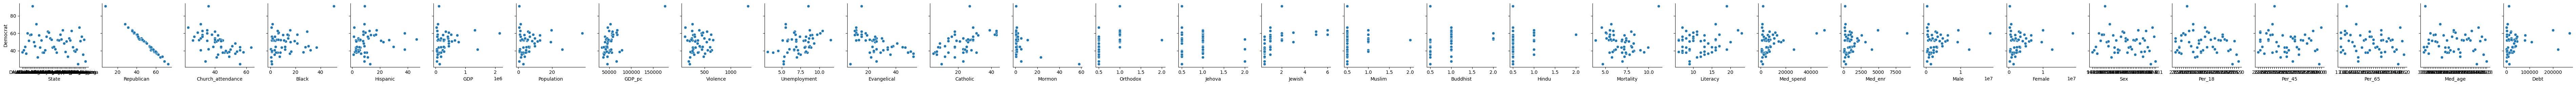

In [7]:
indep_var = df.columns.tolist()
indep_var.remove("Democrat")
dep_var = df.columns.tolist()[1]
sns.pairplot(df, x_vars=indep_var, y_vars=dep_var, kind="scatter")

In [11]:
df = df[["GDP_pc", "Mormon", "Med_enr", "Democrat"]]
df = df.dropna()
x , y = df[["GDP_pc", "Mormon", "Med_enr"]], df["Democrat"]
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Democrat   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     14.27
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           1.14e-06
Time:                        20:28:43   Log-Likelihood:                -172.68
No. Observations:                  49   AIC:                             353.4
Df Residuals:                      45   BIC:                             360.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.5566      3.591      8.789      0.000      24.325      38.788
GDP_pc         0.0003   6.03e-05      5.361      0.000       0.000       0.000
Mormon        -0.3770      0.143     -2.644      0.011      -0.664      -0.090
Med_enr        0.0013      0.001      1.599      0.117      -0.000       0.003
==============================================================================
Omnibus:                        2.277   Durbin-Watson:                   1.694
Prob(Omnibus):                  0.320   Jarque-Bera (JB):                1.363
Skew:                          -0.332   Prob(JB):                        0.506
Kurtosis:                       3.477   Cond. No.                     1.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Whilst the Med_enr is not significant the other results show that for a one unit increase in GDP per capita deomcratic vote share will increase by 0.0003% or, similarly for an increase in the percentage share of the Mormon population in a state the democratic vote share will fall by 0.377%. Lets drop the Med_enr and see what results we get.

In [13]:
x , y = df[["GDP_pc", "Mormon"]], df["Democrat"]
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Democrat   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     19.46
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           7.50e-07
Time:                        20:39:50   Log-Likelihood:                -174.03
No. Observations:                  49   AIC:                             354.1
Df Residuals:                      46   BIC:                             359.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2334      3.492      9.518      0.000      26.205      40.262
GDP_pc         0.0003   6.13e-05      5.242      0.000       0.000       0.000
Mormon        -0.4066      0.144     -2.829      0.007      -0.696      -0.117
==============================================================================
Omnibus:                        3.408   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.182   Jarque-Bera (JB):                2.456
Skew:                          -0.520   Prob(JB):                        0.293
Kurtosis:                       3.350   Cond. No.                     1.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Now we want to run a test for hetroskedasticity one way of doing this is by a Breuch Pagan test where you regress the errors from the initial regression against the independant variables. If any of the coefficients are significantly differnt from 0 you heteroskedasticity i.e. where there is a relationship between the independant variables and the error.

In [18]:
from statsmodels.stats.diagnostic import het_breuschpagan, linear_reset
residuals = results.resid
bp_test = het_breuschpagan(residuals, x)
bp_test_statistic, bp_test_p_value, _, _ = bp_test

print(f'Breusch-Pagan test statistic: {bp_test_statistic}')
print(f'Breusch-Pagan test p-value: {bp_test_p_value}')


Breusch-Pagan test statistic: 0.45224858065611173
Breusch-Pagan test p-value: 0.7976189591824757


### Lets also add in a test for functional mispecification - the ramsay reset test with a power 2 adds in a higher order of the independant variables, i.e. the independant varaible squared regressing and the statistic indicates the variance in the dependant variable beyond the original model. A relatively low test stat indicates that the additional terms do not explain much of the variation in the dependent variable. A high p-value, or one greater than common significance levels such as 0.05 or 0.01 suggests that there is no evidence to reject the null hypothesis of the Ramsey RESET test that there is mispecification.

In [24]:
reset_test = linear_reset(results, power=2, test_type="fitted", use_f=True)

reset_test_statistic = reset_test.fvalue
reset_test_p_value = reset_test.pvalue

print(f'Ramsey RESET test statistic: {reset_test_statistic}')
print(f'Ramsey RESET test p-value: {reset_test_p_value}')


Ramsey RESET test statistic: 0.016427558959053238
Ramsey RESET test p-value: 0.8985855049217001


### Here the low test statistic and the high p-value indidicate that there is no evidence to reject the null hypothesis and hence there is no evidence for mispecification.